In [1]:
import csv
import math
import random
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
sns.set()

In [2]:
data_dir = 'Data'

We can see that there is a strong correlation between the length of a chromosome and the number of condensin peaks per chromosome.

In [3]:
def test(x,y,thresh):
    n = 0
    for value in x:
        if (np.array(list(map(abs,np.subtract(y,value))))< thresh).any()  :
            n+=1
    return n

# LOG

In [4]:
peak_file = data_dir+'/Condensin_peaks_Log.bed'
file_extension = peak_file.split('.')[0].split('_')[-1] if type(peak_file)==str else 'mix'
model_dir = 'model_'+file_extension
results_dir = 'results_'+file_extension

In [5]:
results = pd.read_csv(results_dir+"/results.txt")
results

,N_test_samples AUROC AURPC
0,200 0.9486 0.9576


In [6]:
filter_info = open(results_dir+"/table.txt",'r').readlines()
table = PrettyTable(["Filter", "consensus","annotation","ic",'mean', 'std',"nsites"])
for line in filter_info[1:]:
    ss=line.strip().split(' ')
    while("" in ss):
        ss.remove("")
    table.add_row(ss)
table

Filter,consensus,annotation,ic,mean,std,nsites
0,TCTAGGTCGCGAGTCCGTGTCGCT,.,8.65,0.1370,0.1909,150
1,TACTGTCGCCGTCACCATCTTTGC,.,10.74,0.1462,0.1993,50
2,TTTGTATACAAATCACAAAAATAT,Nhp6ap,19.42,0.3131,0.3118,128
3,GGCGTCGACGCCGGCAGCGCTGCC,.,11.78,0.2676,0.2900,158
4,TATATTTTTTATTGATACTTGGAA,Sum1p,20.80,0.2178,0.2865,253
5,CTATATGTGTGAGTTTGTTTGTTT,.,13.21,0.1918,0.2328,181
6,AAGTATGCTACGAATTTAAGATAG,.,14.74,0.2692,0.2597,127
7,GGCCATCTTGGTCTACCTGTTCTT,.,15.19,0.2986,0.2949,46
8,CAGGTGAGGTAGAGACCACTTCCG,.,10.53,0.4037,0.3108,47
9,GTATGCCTAACTAAGTTAAGTAGA,Nhp6ap,15.20,0.1459,0.1983,76


In [7]:
filter_hits = pd.read_csv(results_dir+"/indices.csv")
chroms = filter_hits['Unnamed: 0']
filter_hits.set_index('Unnamed: 0',inplace=True)
filter_hits

,filter_0,filter_1,filter_2,filter_3,filter_4,filter_5,filter_6,filter_7,filter_8,filter_9,...,filter_30,filter_31,filter_32,filter_33,filter_34,filter_35,filter_36,filter_37,filter_38,filter_39
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
chromosome=II,"[36455, 256557, 300677, 405873]","[236691, 300536, 301010, 414511]",[197599],"[46029, 333695, 333755, 394262]","[226873, 238217, 680576, 680580]","[235542, 236383, 238256, 256891, 405937, 47788...","[6551, 238462, 556981, 680331, 681834]",NaN,[244048],NaN,...,"[45942, 235356, 236418, 238247, 238285, 243898...",NaN,[556826],"[169118, 300890, 606825]","[223257, 225158, 261796, 414089, 557164, 55716...","[6554, 414096]",[375284],"[36572, 301448, 374458]",NaN,"[88765, 680776]"
chromosome=III,"[82487, 107208, 123599, 127756, 177339, 295198]","[58002, 123698, 123701, 138827, 138854, 295579]","[82574, 101229, 112215, 116775]","[57622, 57673, 57679, 110147, 138822, 138840, ...","[14415, 30783, 142545]","[30764, 30768, 82343, 101194, 101812, 114144, ...","[110994, 114349, 114419]","[57414, 177497]","[57690, 90349, 138616]","[30930, 116843]",...,"[11533, 107226, 127791, 127792]",NaN,NaN,[228000],"[11123, 90094, 90221, 107289, 107484, 112527, ...",[102276],NaN,"[82462, 123441]",NaN,"[392, 57613, 57677, 78312, 90854, 110950]"
chromosome=IV,"[456518, 465300, 568877, 602313, 884369, 10172...","[472697, 1461768]","[434240, 569148, 916049, 988284, 1017184, 1489...","[118304, 218154, 230392, 230395, 230401, 23041...","[218381, 322689, 446607, 449760, 472969, 49235...","[229913, 440811, 453945, 519847, 568941, 98865...","[130519, 359513, 359774, 410208, 428010, 43755...","[356542, 988659, 1175708]","[230432, 619883, 721306, 1239717]","[322978, 428333, 444186, 453042, 884322, 98830...",...,"[449744, 449746, 492503, 519891, 519895, 51989...","[1329645, 1329669, 1329684]","[447780, 447780]","[230215, 230215, 323066, 472577]","[428032, 440779, 446477, 454976, 454992, 54153...","[230452, 230566, 309181, 488740, 1239749, 1257...","[117682, 359373, 437881, 488875, 519533, 66801...","[307139, 1017207, 1305679, 1403049, 1529761]","[456566, 1402286, 1450165]","[410387, 555971, 564420, 1175871, 1529245]"
chromosome=Mito,[81743],NaN,"[1092, 1111, 2043, 2246, 2248, 2673, 2675, 444...",NaN,"[32, 228, 230, 394, 394, 661, 664, 683, 698, 7...","[682, 682, 7633, 7705, 9132, 11260, 20582, 328...","[173, 348, 348, 1084, 2219, 4727, 6337, 7447, ...",NaN,NaN,"[288, 288, 6006, 6357, 7272, 7329, 27951, 2823...",...,"[140, 144, 657, 667, 677, 682, 677, 682, 845, ...",NaN,NaN,"[12351, 50706, 52350, 65053, 65688, 65895, 72778]","[318, 318, 2242, 2244, 4434, 6369, 8282, 8300,...",NaN,[20505],NaN,"[7526, 64769]","[28138, 65080, 65910, 77883, 80339, 84248]"
chromosome=V,"[3045, 78105, 138661, 145570, 149850, 149942, ...","[67657, 442114, 551198]",NaN,"[67655, 78712, 397524, 397527, 442301]","[150299, 207426, 424881, 434889, 487218, 551127]","[78073, 78360, 86679, 148712, 207425, 306979, ...","[149800, 152180, 322496, 438640, 469536, 48745...","[79217, 79220, 79223, 79226, 79229, 79232, 792...",[3869],"[79508, 118284, 487170, 551373]",...,"[140312, 152004, 269407]",[79382],"[79447, 150168, 150420]","[2894, 152151, 311957, 573688]","[3964, 77938, 322129, 363689, 576428]","[61992, 207508]","[78048, 78766, 311886, 438516, 443210, 443315,...","[176961, 487331, 574578]","[131028, 431453]","[3786, 148902, 311870, 442093]"
chromosome=VI,"[2235, 64565, 64700, 144879, 191540]",NaN,NaN,"[874, 880, 889, 925, 961, 1033, 1069, 54309]","[101551, 145386, 269713]","[101331, 220447]","[143990, 148549, 148556, 210527]",NaN,"[53678, 148208]","[144626, 145012, 148548, 150144, 226625]",...,"[101596, 145386, 148949]",NaN,NaN,"[220303, 220533]","[101423, 144156, 154069, 162369, 210879, 210885]","[101278, 144235]",[162123],[4447],[101517],"[3361, 4275, 64542, 148629, 220617]"
chromosome=VII,"[255033, 278194, 287620, 399143, 405465, 42331...","[508346, 921439]","[110603, 110666, 555441, 845794]","[148438, 481622, 481865]","[319680, 319914, 400311, 405376, 496999

chromosome=II, filters matrix at threshold 500


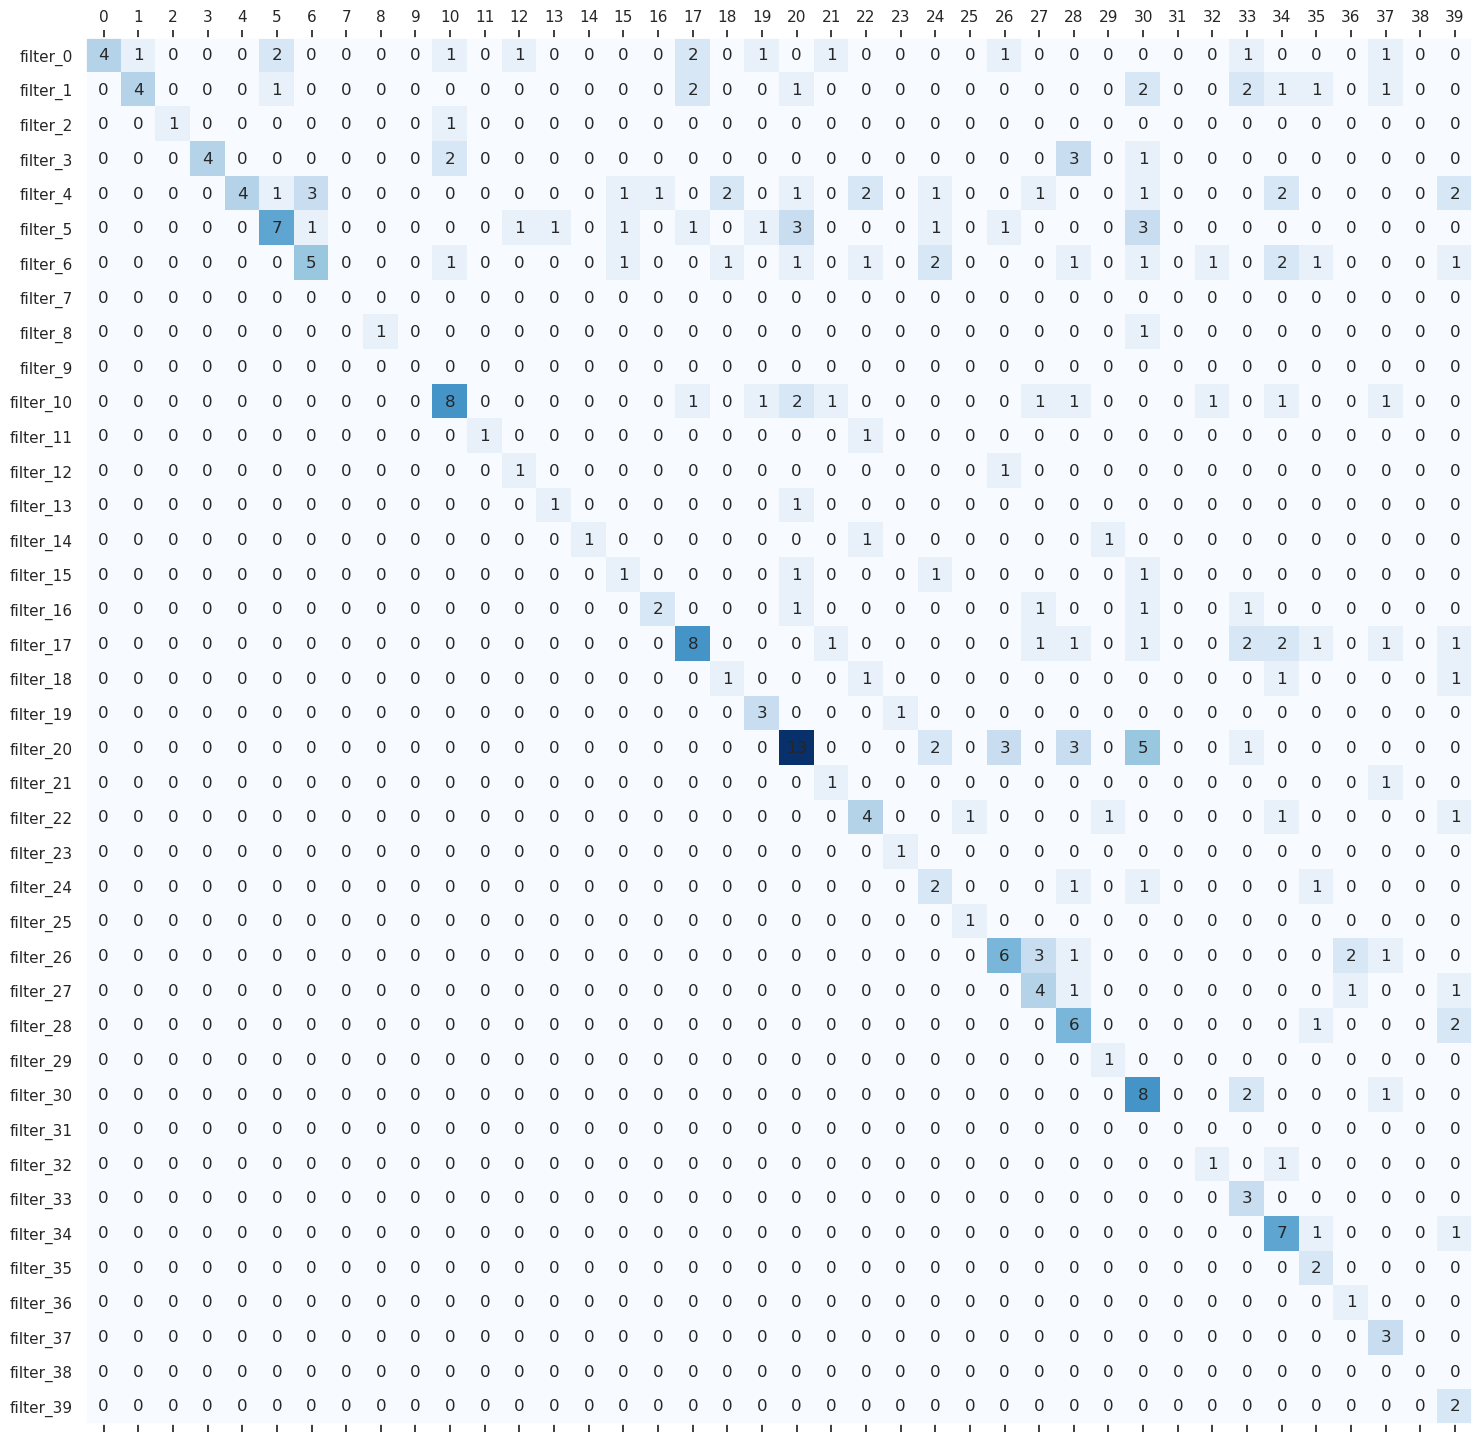

In [8]:
filts = filter_hits.columns
thresh = 500
chrom = chroms[0]
arr = np.zeros((len(filts),len(filts)))
print('\033[1m' + chrom + ', filters matrix at threshold '+str(thresh) + '\033[0m')
chrom_filts = filter_hits.loc[chrom]
fig, ax = plt.subplots(figsize=(18,18))
for i in range (len(filts)):
    if type(filter_hits.loc[chrom][i]) == float:
        continue
    x = list(map(int, filter_hits.loc[chrom][i].replace('[', '').replace(']', '').split(",") ))
    arr[i,i] = len(x)
    #print(filts[i]+' : %i'%len(x))
    filter_corr = {}
    for j in range (i+1,len(filts)):
        if type(filter_hits.loc[chrom][j]) == float:
            continue
        y = list(map(int, filter_hits.loc[chrom][j].replace('[', '').replace(']', '').split(",") ))
        filter_corr[filts[j]]=test(x,y,thresh)
        arr[i,j] = filter_corr[filts[j]]
    #print(filter_corr)
#print(arr)
ax.matshow(arr, cmap=plt.cm.Blues)
for i in range(len(filts)):
    for j in range(len(filts)):
        c = int(arr[j][i])
        ax.text(i,j, str(c), va='center', ha='center')
ax.set_xticks(np.arange(len(filts)))
ax.set_yticks(np.arange(len(filts)))  
#ax.set_xticklabels(list(filts))
ax.set_yticklabels(list(filts))
ax.grid()

# Quiescence

In [9]:
peak_file = data_dir+'/Condensin_peaks_quiescence.bed'
file_extension = peak_file.split('.')[0].split('_')[-1] if type(peak_file)==str else 'mix'
model_dir = 'model_'+file_extension
results_dir = 'results_'+file_extension

In [10]:
results = pd.read_csv(results_dir+"/results.txt")

In [11]:
results

,N_test_samples AUROC AURPC
0,362 0.9720 0.9731


In [12]:
filter_info = open(results_dir+"/table.txt",'r').readlines()
table = PrettyTable(["Filter", "consensus","annotation","ic",'mean', 'std',"nsites"])
for line in filter_info[1:]:
    ss=line.strip().split(' ')
    while("" in ss):
        ss.remove("")
    table.add_row(ss)
table

Filter,consensus,annotation,ic,mean,std,nsites
0,GCGGCGTCACCCTCCGCGGCGGGG,Rsc30p,14.42,0.5028,0.4697,82
1,AGACACGCGAGGCCCGAACTAAGC,.,12.31,0.5534,0.4650,107
2,GGAAGGGAAGGGAAAGGAGCATGT,.,17.37,0.1590,0.2914,291
3,GTCGCGCTTGCCGCGGCGGGTGGG,.,9.32,0.4114,0.4645,279
4,GCTTCGTCCGCGCCTCGGCCGGCG,.,9.34,0.5266,0.4509,160
5,TATCTGTTTTTCTTTTGACTTTTC,.,28.62,0.4493,0.5074,608
6,AACTTGCGGTTCCCCGGGTTAAAT,.,10.01,0.6750,0.5235,45
7,AAAAAAAAAACATACCCCTAAAAA,.,25.84,0.2080,0.3286,353
8,ACGTGCGGTCAAATTAAACTGACG,.,10.46,0.4927,0.5092,56
9,TAAAGCGAACGAGGTCTTTAATTC,Kar4p,12.47,0.8042,0.5537,119


In [13]:
filter_hits = pd.read_csv(results_dir+"/indices.csv")
chroms = filter_hits['Unnamed: 0']
filter_hits.set_index('Unnamed: 0',inplace=True)
filter_hits

,filter_0,filter_1,filter_2,filter_3,filter_4,filter_5,filter_6,filter_7,filter_8,filter_9,...,filter_30,filter_31,filter_32,filter_33,filter_34,filter_35,filter_36,filter_37,filter_38,filter_39
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
chromosome=I,[190049],[223796],"[20958, 68220, 69702, 92417]","[45345, 70930]","[190014, 223791]","[29746, 29748, 69816, 69818, 69819, 69820, 698...",NaN,"[70903, 70906, 71116]",[189826],[205594],...,"[31243, 68610, 69661, 69670, 70904, 71100, 711...","[68350, 177438, 189839, 211154]","[31243, 68220, 69661, 69707, 70904, 71106, 711...",[151706],NaN,NaN,[169139],NaN,"[141640, 151547]",[139081]
chromosome=II,"[193770, 193778, 490638]","[145949, 191862, 281210, 342000, 373184, 45227...","[45121, 45240, 63660, 63662, 140651, 238094, 2...","[101396, 164269, 203206, 217250, 405985, 45229...","[36565, 84526, 193677, 193778, 337041, 606071,...","[60939, 338210, 338216, 339270, 339448, 339449...","[193775, 604171]","[5580, 5619, 62776, 63666, 74873, 145898, 1458...","[36782, 74811, 125004, 202373, 203509, 237674,...","[191885, 235928, 342250, 623165]",...,"[89759, 145897, 342250, 391571, 423384, 423385...","[61016, 96227, 159864, 326777, 342442, 381715,...","[45121, 63659, 63661, 96032, 391572, 391574, 3...","[117208, 124627, 474064, 477594]","[159791, 236142, 338538]","[145832, 159693, 217428, 236086, 237458, 31171...","[117200, 136218, 192025, 278374, 326789, 33691...","[342255, 392578, 449592, 564815, 586332, 59567...","[124875, 203389, 280998, 378615]","[45137, 281172, 392742, 415620, 555380, 564987..."
chromosome=IV,"[62211, 461515, 636211, 636276, 806418, 1528735]","[9988, 115971, 132108, 205669, 366253, 411333,...","[221877, 357037, 357038, 357042, 366254, 36917...","[133021, 432162, 432171, 432174, 568989, 57927...","[9968, 148151, 411504, 591887, 636287, 636294,...","[76723, 76725, 76733, 126512, 126513, 126518, ...","[98097, 307977, 315234, 593689, 765235, 946155...","[14020, 116123, 158938, 369257, 369258, 369259...","[94273, 217194, 657444, 693375, 969726, 1279003]","[212935, 234363, 264251, 359512, 538792, 54370...",...,"[10034, 94495, 117673, 130728, 132055, 133119,...","[212944, 366578, 392357, 392526, 449809, 45292...","[14010, 357041, 366253, 366259, 368992, 369266...","[117396, 134755, 308344, 892392, 946220, 10955...","[134859, 330936, 652499, 699729, 1242522, 1490...","[158782, 302822, 1362642]","[366330, 463132, 506052, 755291, 836250, 90957...","[232562, 330960, 361247, 369241, 392455, 61644...","[74274, 74275, 232294, 315072, 366543, 488972,...","[13853, 61736, 126188, 132246, 206056, 366316,..."
chromosome=IX,[3261],"[138210, 150381, 216099]","[41590, 41591, 138606, 139571, 139578, 177554,...","[7955, 197618, 382271, 439648, 439814, 439854]","[5284, 5293, 41636, 240957, 257425]","[19085, 19086, 76001, 76003, 76005, 102524, 10...",NaN,"[6778, 7723, 7723, 22116, 175248, 187821, 1878...","[3308, 394991, 439793]","[150199, 258485]",...,"[142419, 187820, 241939, 380929, 384277, 38934...","[3289, 6738, 22116, 22118, 132203, 138269, 177...","[139578, 177554, 177559, 187829, 187831, 18783...","[142707, 249358, 268338]","[254375, 380579]",NaN,"[19019, 150335, 215956, 241872, 384367, 386825...","[3786, 93554, 268005, 291975, 380648]","[249416, 386884, 388626, 420826]",[187703]
chromosome=V,"[123293, 573552]","[18696, 67027, 77579, 132952, 152113, 202163, ...","[46494, 151426, 151431, 152115, 153026, 211999...","[69429, 85164, 159444, 177125, 192194, 261717,...","[42094, 42095, 42264, 311600, 396491, 396494, ...","[16058, 16060, 34079, 34081, 34084, 34087, 340...","[434831, 517651]","[6293, 6395, 6412, 86485, 86487, 86488, 86489,...","[23749, 194744, 545580]","[13421, 131401, 435655]",...,"[33785, 66821, 85427, 100571, 100572, 123129, ...","[13570, 42291, 159244, 322264, 487470, 545284,...","[46490, 69051, 86492, 100580, 123130, 152097, ...","[80329, 242400, 242461, 250195, 342403, 396652]","[311690, 335726, 573354]","[34060, 202062, 491287]","[177252, 242179]","[16201, 18744, 225593, 487249]","[1353

chromosome=I, filters matrix at threshold 500


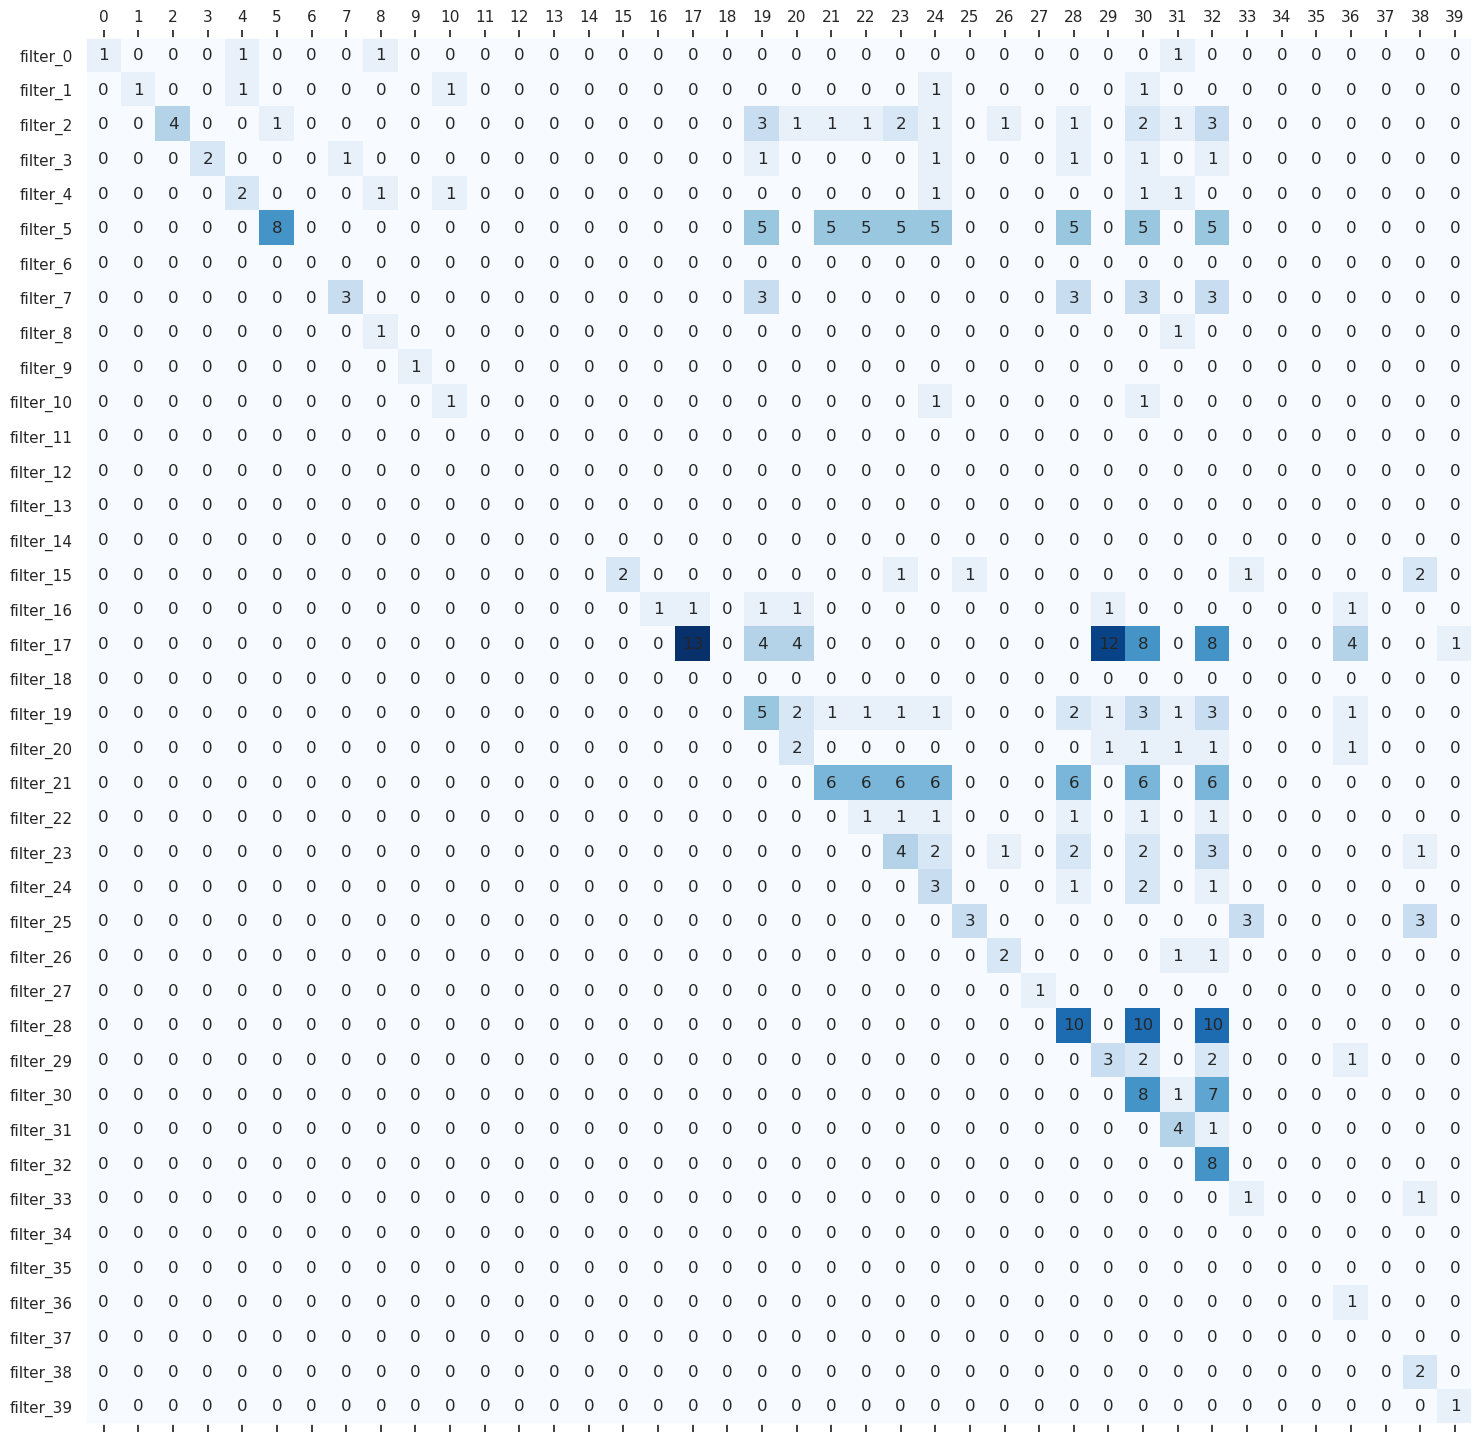

In [14]:
filts = filter_hits.columns
thresh = 500
chrom = chroms[0]
arr = np.zeros((len(filts),len(filts)))
print('\033[1m' + chrom + ', filters matrix at threshold '+str(thresh) + '\033[0m')
chrom_filts = filter_hits.loc[chrom]
fig, ax = plt.subplots(figsize=(18,18))
for i in range (len(filts)):
    if type(filter_hits.loc[chrom][i]) == float:
        continue
    x = list(map(int, filter_hits.loc[chrom][i].replace('[', '').replace(']', '').split(",") ))
    arr[i,i] = len(x)
    #print(filts[i]+' : %i'%len(x))
    filter_corr = {}
    for j in range (i+1,len(filts)):
        if type(filter_hits.loc[chrom][j]) == float:
            continue
        y = list(map(int, filter_hits.loc[chrom][j].replace('[', '').replace(']', '').split(",") ))
        filter_corr[filts[j]]=test(x,y,thresh)
        arr[i,j] = filter_corr[filts[j]]
    #print(filter_corr)
#print(arr)
ax.matshow(arr, cmap=plt.cm.Blues)
for i in range(len(filts)):
    for j in range(len(filts)):
        c = int(arr[j][i])
        ax.text(i,j, str(c), va='center', ha='center')
ax.set_xticks(np.arange(len(filts)))
ax.set_yticks(np.arange(len(filts)))  
#ax.set_xticklabels(list(filts))
ax.set_yticklabels(list(filts))
ax.grid()

# LOG + Quiescence

In [15]:
peak_file = [data_dir+'/Condensin_peaks_Log.bed',data_dir+'/Condensin_peaks_quiescence.bed']
file_extension = peak_file.split('.')[0].split('_')[-1] if type(peak_file)==str else 'mix'
model_dir = 'model_'+file_extension
results_dir = 'results_'+file_extension

In [16]:
results = pd.read_csv(results_dir+"/results.txt")
results

,N_test_samples AUROC AURPC
0,610 0.9756 0.9769


In [17]:
filter_info = open(results_dir+"/table.txt",'r').readlines()
table = PrettyTable(["Filter", "consensus","annotation","ic",'mean', 'std',"nsites"])
for line in filter_info[1:]:
    ss=line.strip().split(' ')
    while("" in ss):
        ss.remove("")
    table.add_row(ss)
table

Filter,consensus,annotation,ic,mean,std,nsites
0,GGGCATACGTTAACCTGCGAGCAT,.,11.35,0.2389,0.2527,38
1,TTAACACGCGGTAAGCGCTTAACC,.,10.18,0.1637,0.1922,147
2,ACACATACTTATCGTTTTTTTTGC,Hsf1p,19.86,0.2964,0.3124,457
3,AGTGCGCCGCGTACTCACTGATTA,.,9.61,0.1206,0.1814,97
4,CTGCTGTTGGAGCAGCAAAAGCTG,.,14.20,0.4280,0.2994,97
5,GGCGTAACGCTCGGCTAAAGACGC,.,9.38,0.0517,0.1129,17
6,TCATTATTCATCATACTCCATCTG,.,12.46,0.1767,0.2216,259
7,CTGACAGACGGTTCCTCCTCAACG,.,11.10,0.2407,0.2631,121
8,GCCTTAGAAGTTCGGCTTACCAAC,.,9.73,0.1157,0.1664,163
9,TTGGGTCCTTAGAAAGCGAACACT,.,10.86,0.1686,0.2042,104


In [18]:
filter_hits = pd.read_csv(results_dir+"/indices.csv")
chroms = filter_hits['Unnamed: 0']
filter_hits.set_index('Unnamed: 0',inplace=True)
filter_hits

,filter_0,filter_1,filter_2,filter_3,filter_4,filter_5,filter_6,filter_7,filter_8,filter_9,...,filter_50,filter_51,filter_52,filter_53,filter_54,filter_55,filter_56,filter_57,filter_58,filter_59
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
chromosome=IV,"[331241, 1531130, 117505, 407534, 770257, 9501...","[83757, 455607, 492045, 564553, 1527974, 13503...","[447755, 447755, 449747, 453664, 521056, 88456...","[172401, 303085, 644001, 1166568, 1214085, 149...","[230417, 230429, 230435, 230438, 230447, 23045...","[94150, 1267001]","[440647, 568739, 802550, 946544, 988743, 10756...","[526074, 988325, 1243502, 94057, 158893, 30299...","[410212, 447578, 555759, 981017, 1237067, 1245...","[331364, 449843, 453128, 721239, 449843, 46145...",...,"[307293, 410219, 455074, 1257065, 1352340, 943...","[446848, 881473, 946412, 946554, 1150689, 1175...","[230406, 230412, 230415, 492269, 492269, 12396...","[230411, 230423, 230429, 230432, 322782, 49226...","[440442, 929913, 1239584, 693446, 765436, 1080...","[434305, 768684, 1402964, 303070, 699458, 7698...","[1270117, 1301962, 217293, 264388, 576190, 653...","[1329654, 1329705, 1489443, 1489761, 62257, 13...","[156276, 314896, 452887, 721716, 751487, 93061...","[580348, 881774, 988493, 1099084, 1201860, 123..."
chromosome=IX,"[351172, 18853]","[255337, 324329, 336375, 384196, 415725, 415995]","[69566, 248937, 370641, 76000, 76005, 102524, ...","[174920, 142037, 174920]","[255658, 132058]","[317741, 382539]","[9247, 21975, 188016, 386672]","[197463, 370606, 19210, 207633, 415670]","[6651, 268054, 291949, 386633, 433486]","[231771, 317620, 3416, 388662]",...,"[248889, 6849]","[234, 234, 33189, 388438]",NaN,"[1938, 258191, 268246]","[255497, 242019, 332794]","[7956, 6584, 7956, 18887, 41870, 177642]",[380693],"[1553, 1726, 365545, 5282, 102394, 141929, 141...","[355565, 364207, 177486]",NaN
chromosome=VII,"[495446, 23507]","[346161, 542074, 544603, 823513, 845896, 10869...","[278775, 278777, 400265, 648469, 739243, 77441...","[490849, 857507, 1087691, 165124, 271754, 5895...",NaN,[516359],"[287291, 399420, 423043, 561595, 563861, 82334...","[437352, 441937, 735915, 230147, 437352, 82382...","[561705, 661960, 739300, 107583, 166129, 20869...","[185695, 490814, 499808, 531576, 712640, 82870...",...,"[437718, 442746, 490634, 787563, 787603, 84562...","[122493, 148261, 205385, 504486, 534238, 78734...","[271562, 610047]","[226023, 281380, 371354, 581680, 701014, 772129]","[254909, 921668, 123346, 427030, 547490, 62543...","[95364, 124254, 166055, 439809, 598966, 609800...","[481921, 147819, 426911, 609917, 739628, 795776]","[95362, 483605, 625485, 678000, 739530, 1081045]","[555968, 556131, 774242, 815499, 20811, 123729...","[437518, 508413, 539077, 95022, 802203]"
chromosome=XII,"[158024, 1070654, 633344, 1070654]","[92, 7260, 11429, 158018, 165496, 441202, 4451...","[86823, 264065, 264067, 264069, 264071, 264073...","[10644, 445113, 449752, 784373, 1068332, 18001...","[48022, 158255, 243227, 243242, 329730, 329736...","[856489, 611894]","[108747, 638268, 963120, 13880, 29499, 48564, ...","[163722, 254671, 262560, 481872, 540893, 79409...","[167987, 198356, 198409, 283426, 348605, 93124...","[244054, 638327, 819872, 1029375, 493542, 7235...",...,"[8934, 148568, 167122, 402793, 687673, 729997,...","[9245, 163844, 218254, 218254, 244039, 262462,...","[329734, 329737, 329740, 329734]","[854, 7353, 7362, 7389, 243227, 263733, 107067...","[147400, 243229, 243256, 329747, 401846, 47267...","[877, 198231, 784520, 975993, 877, 6520, 19823...","[283472, 628259, 1072182, 234698, 424386, 6282...","[7193, 48019, 96995, 159459, 232793, 281981, 3...","[167844, 348277, 628290, 654835, 80415, 167844...","[218555, 370656, 370656, 576445]"
chromosome=XIV,"[105048, 331010, 350746]","[1508, 61978, 63385, 230450, 63385, 281923, 40...","[89309, 89310, 89311, 174685, 415042, 415050, ...","[62328, 174518, 174575, 577410, 34220, 174518,...","[282956, 282965, 493993, 502733, 495230]",NaN,"[25258, 89644, 568239, 575632, 577154, 586187,...

chromosome=IV, filters matrix at threshold 500


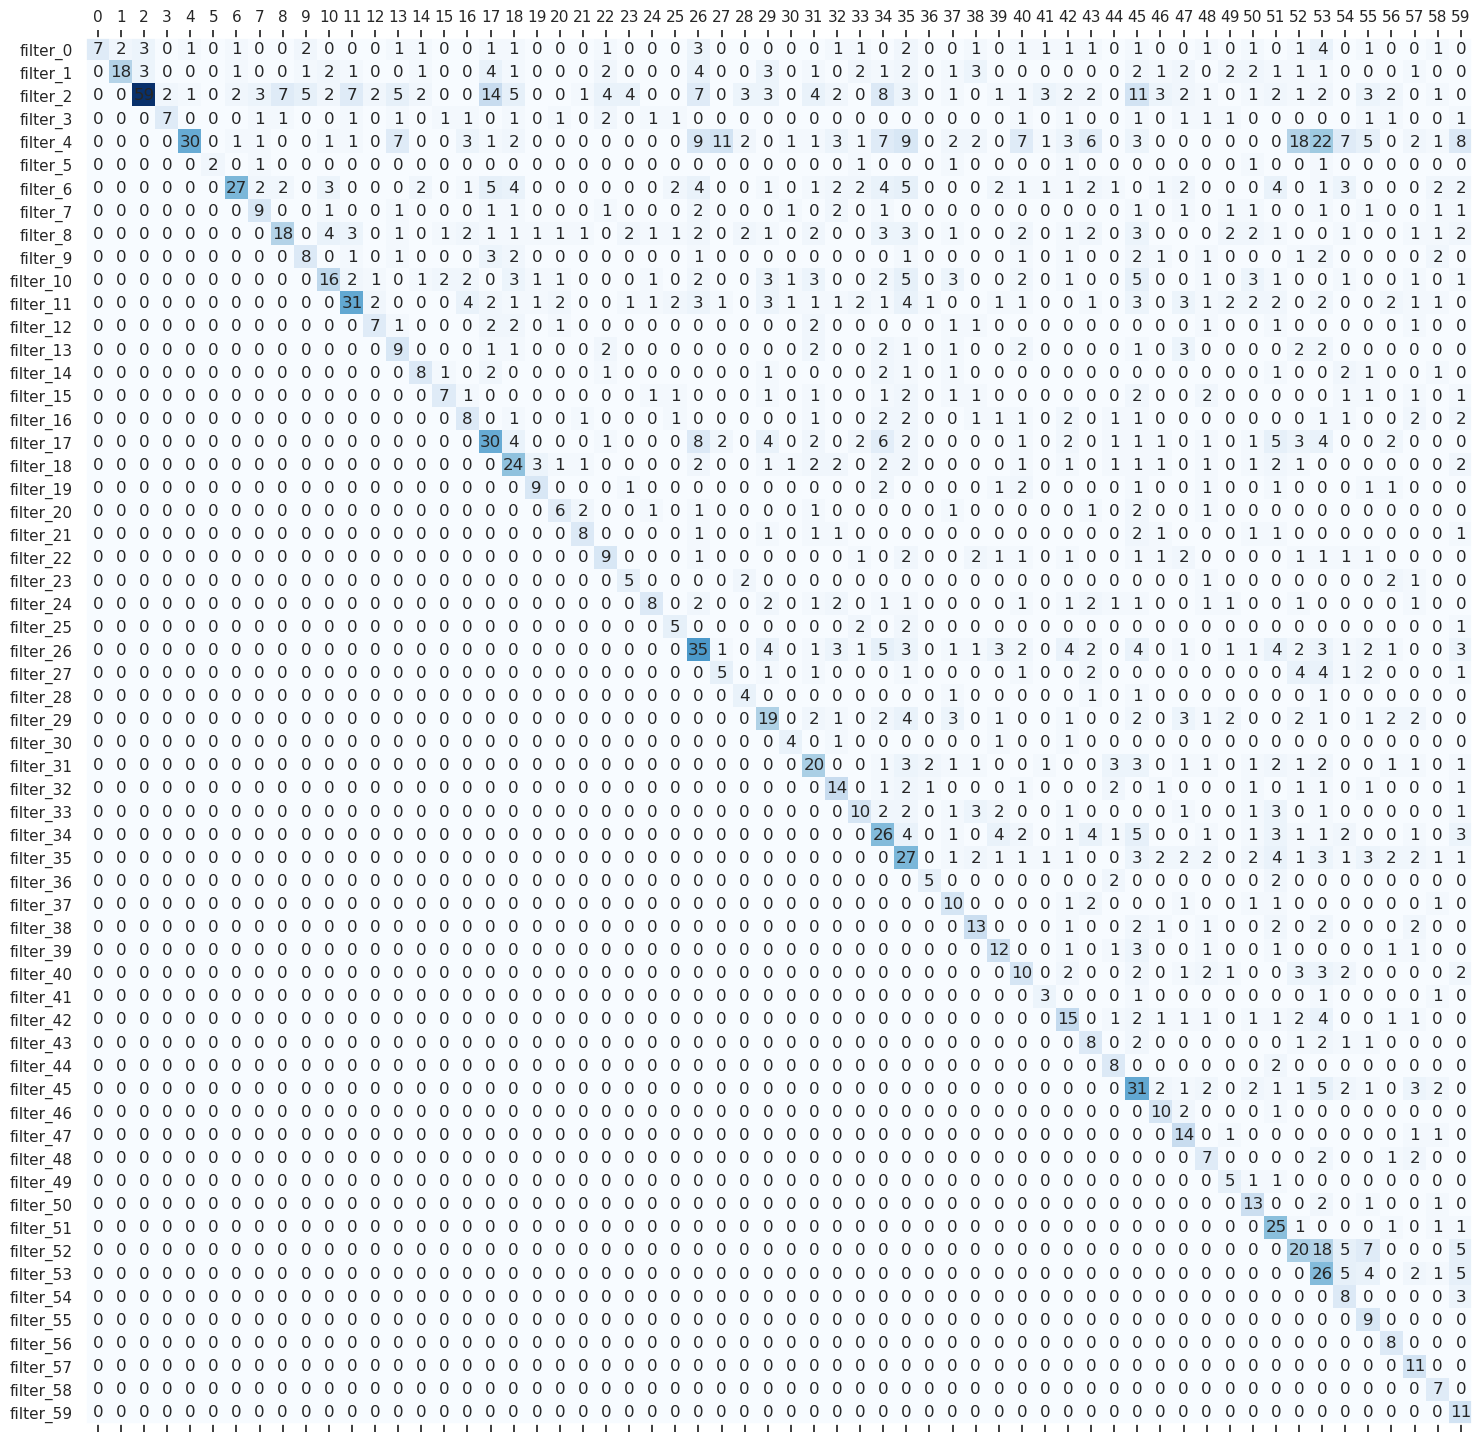

In [19]:
filts = filter_hits.columns
thresh = 500
chrom = chroms[0]
arr = np.zeros((len(filts),len(filts)))
print('\033[1m' + chrom + ', filters matrix at threshold '+str(thresh) + '\033[0m')
chrom_filts = filter_hits.loc[chrom]
fig, ax = plt.subplots(figsize=(18,18))
for i in range (len(filts)):
    if type(filter_hits.loc[chrom][i]) == float:
        continue
    x = list(map(int, filter_hits.loc[chrom][i].replace('[', '').replace(']', '').split(",") ))
    arr[i,i] = len(x)
    #print(filts[i]+' : %i'%len(x))
    filter_corr = {}
    for j in range (i+1,len(filts)):
        if type(filter_hits.loc[chrom][j]) == float:
            continue
        y = list(map(int, filter_hits.loc[chrom][j].replace('[', '').replace(']', '').split(",") ))
        filter_corr[filts[j]]=test(x,y,thresh)
        arr[i,j] = filter_corr[filts[j]]
    #print(filter_corr)
#print(arr)
ax.matshow(arr, cmap=plt.cm.Blues)
for i in range(len(filts)):
    for j in range(len(filts)):
        c = int(arr[j][i])
        ax.text(i,j, str(c), va='center', ha='center')
ax.set_xticks(np.arange(len(filts)))
ax.set_yticks(np.arange(len(filts)))  
#ax.set_xticklabels(list(filts))
ax.set_yticklabels(list(filts))
ax.grid()